<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/qf-workshop-2021/introduction-to-machine-learning/blob/main/1_notebooks/introduction-to-machine-learning.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Introduction to Machine Learning

## Validation and Testing 

When data is used for forecasting there is a danger that the machine learning model will work very well for data, but will not generalize well to other data. An obvious point is that it is important that the data used in a machine learning model be representative of the situations to which the model is to be applied. It is also important to test a model out-of-sample, by this we mean that the model should be tested on data that is different from the sample data used to determine the parameters of the model.

Data scientist refer to the sample data as the **training set** and the data used to determine the accuracy of the model as the **test set**, often a **validation set** is used as well as we explain later;

In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'salary_vs_age_1.csv' 
# (in the same directory that your python process is based)
# Control delimiters, with read_table 
df1 = pd.read_table(path + "salary_vs_age_1.csv", sep=";") 
# Preview the first 5 lines of the loaded data 
print(df1.head())

   Age  Salary
0   25  135000
1   27  105000
2   30  105000
3   35  220000
4   40  300000


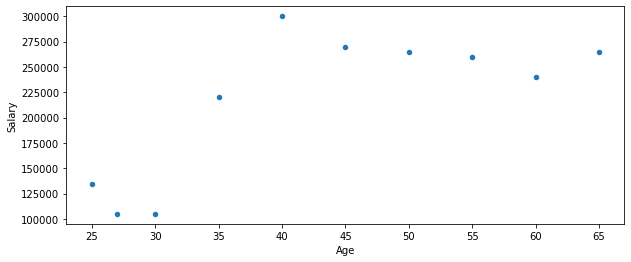

In [3]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 4]
ax=plt.gca()

df1.plot(x ='Age', y='Salary', kind = 'scatter', ax=ax)
plt.show()

[polynomial fitting with pandas](https://joshualoong.com/2018/10/03/Fitting-Polynomial-Regressions-in-Python/)

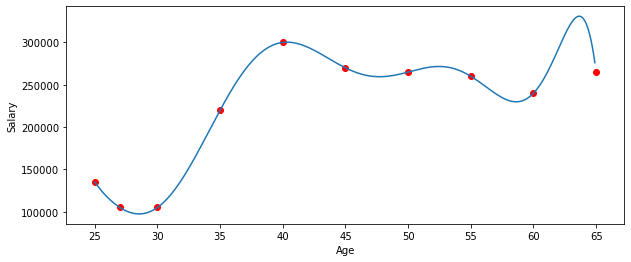

In [13]:
import numpy as np

x1 = df1['Age']
y1 = df1['Salary']

n = len(x1)

degree = 9

weights = np.polyfit(x1, y1, degree)
model   = np.poly1d(weights)

xx1 = np.arange(x1[0], x1[n-1], 0.1)
plt.plot(xx1, model(xx1))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x1,y1, color='red')
plt.show()

In [14]:
y1  = np.array(y1)
yy1 = np.array(model(x1))

rmse = np.sqrt(np.sum((y1-yy1)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
0.0007184405154295555


In [15]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [16]:
df2 = pd.read_table(path + "salary_vs_age_2.csv", sep=";") 
x2 = df2['Age']
y2 = df2['Salary']
n  = len(x2)

y2  = np.array(y2)
yy2 = np.array(model(x2))

rmse = np.sqrt(np.sum((y2-yy2)**2)/(n-1)) 

print('Root Mean Square Error:')
print(rmse)

Root Mean Square Error:
44726.74305949611


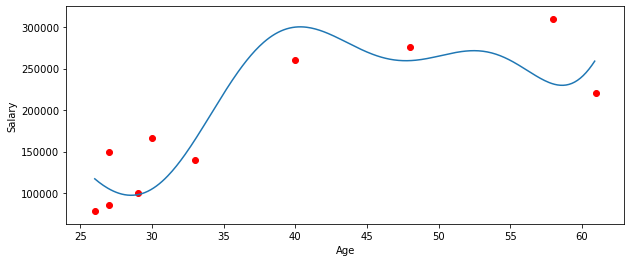

In [17]:
xx2 = np.arange(x2[0], x2[n-1], 0.1)
plt.plot(xx2, model(xx2))
plt.xlabel("Age")
plt.ylabel("Salary")
plt.scatter(x2,y2, color='red')
plt.show()

- The root mean squared error (rmse) for the training      data set is \$12,902
- The rmse for the test data set is \$38,794

We conclude that the model overfits the data. The complexity of the model should be increased only until out-of-sample tests indicate that it does not generalize well.

## References

**S. Raschka and V. Mirjalili**, *"Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2"*, 3rd Edition. Packt Publishing Ltd, 2019.
 
**A. Géron**, *"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"*, 2nd Edition. O’Reilly Media, 2019  
     
[Scikit-Learn web site](https://scikit-learn.org/)   
